In [1]:
%pip install matplotlib pandas seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 944.9 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.0 MB 944.9 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/11.0 MB 947.2 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.0 MB 946.4 kB/s eta 0:00

Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


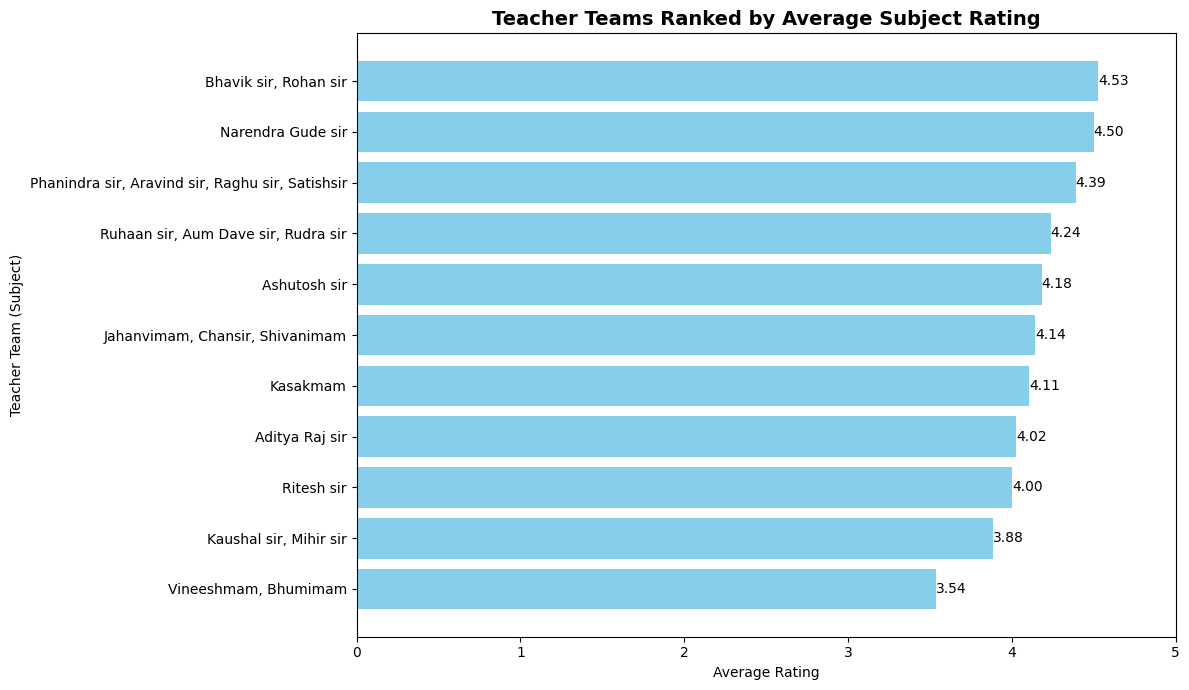

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load your feedback CSV ---
file_path = "Teacher's Day Student Session Feedback - 5_9_2025 (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# Keep only necessary columns
df_clean = df[['Which sessions did you attend?', 'How would you rate the sessions you attended?']].dropna()

# Calculate average ratings per subject
subject_avg_ratings = (
    df_clean.groupby('Which sessions did you attend?')['How would you rate the sessions you attended?']
    .mean()
    .reset_index()
)

# Mapping of subjects to teacher teams
subject_teacher_map = {
    "ICP": "Ruhaan sir, Aum Dave sir, Rudra sir",
    "FSSI": "Ashutosh sir",
    "BEE": "Vineeshmam, Bhumimam",
    "DSC++": "Kaushal sir, Mihir sir",
    "Basics of VLSI": "Kasakmam",
    "Networking": "Jahanvimam, Chansir, Shivanimam",
    "CoA": "Narendra Gude sir",
    "Found. of Electronics": "Phanindra sir, Aravind sir, Raghu sir, Satishsir",
    "Programming": "Aditya Raj sir",
    "Competitive Programming": "Abhay sir, Aryan sir",
    "DevOps+CN": "Bhavik sir, Rohan sir",
    "Intro. to AI": "Malhar sir",
    "OOP": "Ritesh sir"
}

# Add teacher team names
subject_avg_ratings['Teacher Team'] = subject_avg_ratings['Which sessions did you attend?'].map(subject_teacher_map)

# Sort by rating (highest first)
subject_avg_ratings = subject_avg_ratings.sort_values(by='How would you rate the sessions you attended?', ascending=False)

# --- Plot ---
plt.figure(figsize=(12,7))
bars = plt.barh(subject_avg_ratings['Teacher Team'], subject_avg_ratings['How would you rate the sessions you attended?'], color="skyblue")
plt.title("Teacher Teams Ranked by Average Subject Rating", fontsize=14, fontweight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Teacher Team (Subject)")
plt.xlim(0, 5)
plt.gca().invert_yaxis()  # Highest rating at top
plt.bar_label(bars, fmt="%.2f")  # Show numbers on bars
plt.tight_layout()
plt.show()


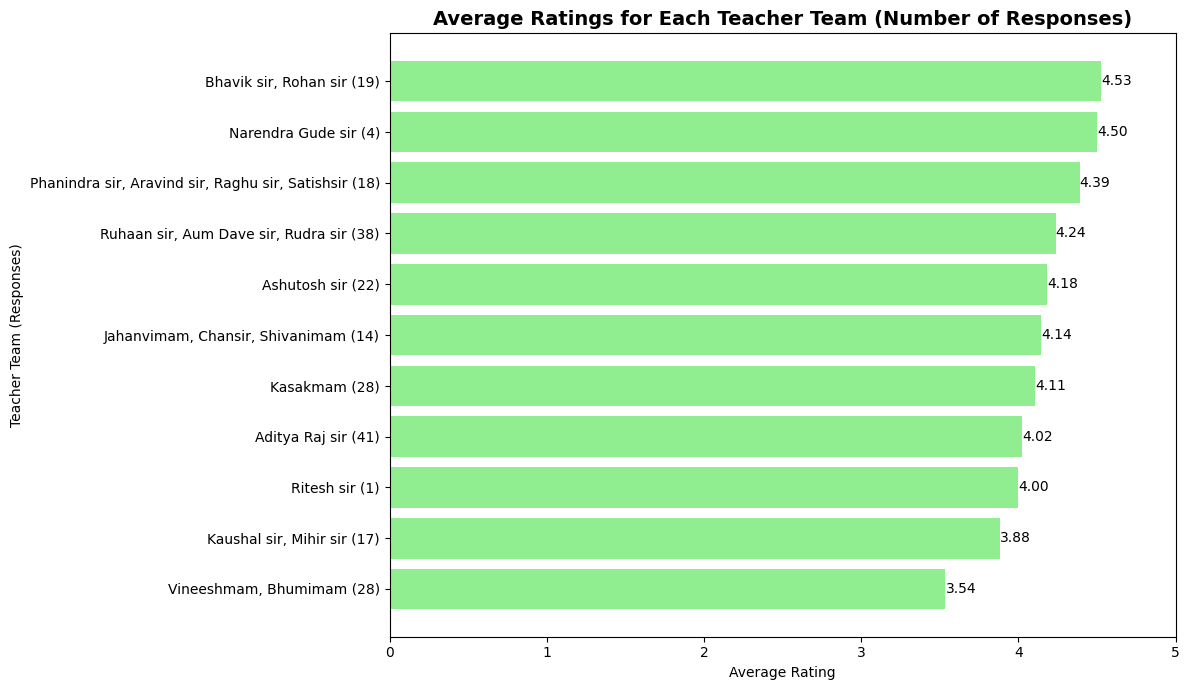

In [9]:
# Calculate response count per session
response_counts = df_clean['Which sessions did you attend?'].value_counts()

# Add response count to the subject_avg_ratings DataFrame
subject_avg_ratings['Responses'] = subject_avg_ratings['Which sessions did you attend?'].map(response_counts)

# Create labels with teacher team and response count
labels = subject_avg_ratings.apply(
    lambda row: f"{row['Teacher Team']} ({row['Responses']})", axis=1
)

plt.figure(figsize=(12,7))
bars = plt.barh(labels, subject_avg_ratings['How would you rate the sessions you attended?'], color="lightgreen")
plt.title("Average Ratings for Each Teacher Team (Number of Responses)", fontsize=14, fontweight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Teacher Team (Responses)")
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.bar_label(bars, fmt="%.2f")
plt.tight_layout()
plt.show()


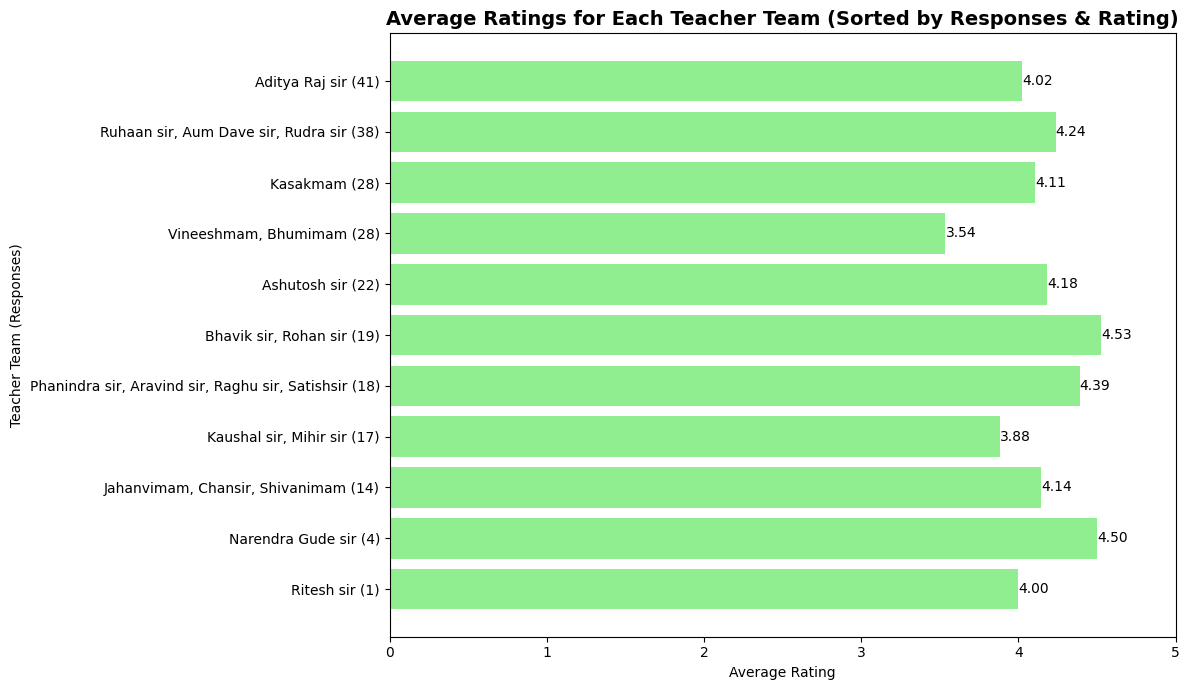

In [10]:
# Sort by Responses (descending), then by Average Rating (descending)
subject_avg_ratings_sorted = subject_avg_ratings.sort_values(
    by=['Responses', 'How would you rate the sessions you attended?'],
    ascending=[False, False]
)

# Update labels for sorted DataFrame
labels_sorted = subject_avg_ratings_sorted.apply(
    lambda row: f"{row['Teacher Team']} ({row['Responses']})", axis=1
)

plt.figure(figsize=(12,7))
bars = plt.barh(labels_sorted, subject_avg_ratings_sorted['How would you rate the sessions you attended?'], color="lightgreen")
plt.title("Average Ratings for Each Teacher Team (Sorted by Responses & Rating)", fontsize=14, fontweight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Teacher Team (Responses)")
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.bar_label(bars, fmt="%.2f")
plt.tight_layout()
plt.show()


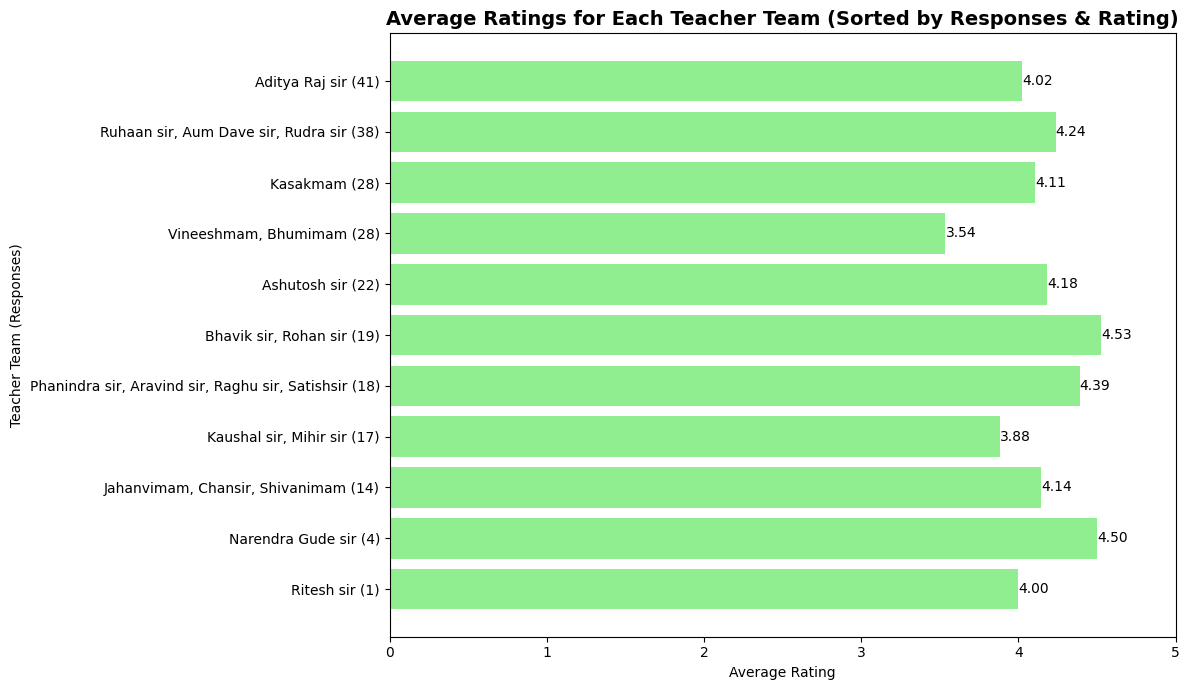

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load your feedback CSV ---
file_path = "Teacher's Day Student Session Feedback - 5_9_2025 (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# Keep only necessary columns
df_clean = df[['Which sessions did you attend?', 'How would you rate the sessions you attended?']].dropna()

# Calculate average ratings + response count per subject
subject_avg_ratings = (
    df_clean.groupby('Which sessions did you attend?')['How would you rate the sessions you attended?']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Average Rating', 'count': 'Responses'})
)

# Mapping of subjects to teacher teams
subject_teacher_map = {
    "ICP": "Ruhaan sir, Aum Dave sir, Rudra sir",
    "FSSI": "Ashutosh sir",
    "BEE": "Vineeshmam, Bhumimam",
    "DSC++": "Kaushal sir, Mihir sir",
    "Basics of VLSI": "Kasakmam",
    "Networking": "Jahanvimam, Chansir, Shivanimam",
    "CoA": "Narendra Gude sir",
    "Found. of Electronics": "Phanindra sir, Aravind sir, Raghu sir, Satishsir",
    "Programming": "Aditya Raj sir",
    "Competitive Programming": "Abhay sir, Aryan sir",
    "DevOps+CN": "Bhavik sir, Rohan sir",
    "Intro. to AI": "Malhar sir",
    "OOP": "Ritesh sir"
}

# Add teacher team names
subject_avg_ratings['Teacher Team'] = subject_avg_ratings['Which sessions did you attend?'].map(subject_teacher_map)

# Sort by responses first, then by average rating
subject_avg_ratings_sorted = subject_avg_ratings.sort_values(
    by=['Responses', 'Average Rating'],
    ascending=[False, False]
)

# Labels include teacher team + number of responses
labels_sorted = subject_avg_ratings_sorted.apply(
    lambda row: f"{row['Teacher Team']} ({row['Responses']})", axis=1
)

# --- Plot ---
plt.figure(figsize=(12,7))
bars = plt.barh(labels_sorted, subject_avg_ratings_sorted['Average Rating'], color="lightgreen")
plt.title("Average Ratings for Each Teacher Team (Sorted by Responses & Rating)", fontsize=14, fontweight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Teacher Team (Responses)")
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.bar_label(bars, fmt="%.2f")
plt.tight_layout()
plt.show()
